**Segundo análisis del clustering de fire seasons a nivel global**

In [2]:
# Cargamos los datos
load("ba_data.Rdata", verbose = TRUE)

Loading objects:
  df
  coords


In [3]:
# Localizamos los NAs
naind <- which(is.na(df), arr.ind = TRUE)
length(naind)

[1] 19554696

In [4]:
# Datos logarítmicos
df.log = log1p(df)
summary(df.log)

 Jan_burned_area  Feb_burned_area  Mar_burned_area  Apr_burned_area 
 Min.   : 0.0     Min.   : 0.0     Min.   : 0.0     Min.   :0.0     
 1st Qu.: 0.0     1st Qu.: 0.0     1st Qu.: 0.0     1st Qu.:0.0     
 Median : 0.0     Median : 0.0     Median : 0.0     Median :0.0     
 Mean   : 0.7     Mean   : 0.6     Mean   : 0.8     Mean   :0.9     
 3rd Qu.: 0.0     3rd Qu.: 0.0     3rd Qu.: 0.0     3rd Qu.:0.0     
 Max.   :10.9     Max.   :10.5     Max.   :10.6     Max.   :9.9     
 NA's   :814779   NA's   :814779   NA's   :814779   NA's   :814779  
 May_burned_area  Jun_burned_area  Jul_burned_area  Aug_burned_area 
 Min.   : 0.0     Min.   : 0.0     Min.   : 0.0     Min.   : 0.0    
 1st Qu.: 0.0     1st Qu.: 0.0     1st Qu.: 0.0     1st Qu.: 0.0    
 Median : 0.0     Median : 0.0     Median : 0.0     Median : 0.0    
 Mean   : 0.9     Mean   : 0.9     Mean   : 1.2     Mean   : 1.4    
 3rd Qu.: 0.0     3rd Qu.: 0.0     3rd Qu.: 1.6     3rd Qu.: 2.2    
 Max.   :10.4     Max.   :10.7    

In [6]:
summary(df)

 Jan_burned_area   Feb_burned_area   Mar_burned_area   Apr_burned_area  
 Min.   :    0.0   Min.   :    0.0   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:    0.0   1st Qu.:    0.0   1st Qu.:    0.0   1st Qu.:    0.0  
 Median :    0.0   Median :    0.0   Median :    0.0   Median :    0.0  
 Mean   :  229.6   Mean   :   95.2   Mean   :   60.6   Mean   :   71.1  
 3rd Qu.:    0.0   3rd Qu.:    0.0   3rd Qu.:    0.0   3rd Qu.:    0.0  
 Max.   :56517.3   Max.   :34960.4   Max.   :42171.4   Max.   :19675.4  
 NA's   :814779    NA's   :814779    NA's   :814779    NA's   :814779   
 May_burned_area   Jun_burned_area   Jul_burned_area   Aug_burned_area  
 Min.   :    0.0   Min.   :    0.0   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:    0.0   1st Qu.:    0.0   1st Qu.:    0.0   1st Qu.:    0.0  
 Median :    0.0   Median :    0.0   Median :    0.0   Median :    0.0  
 Mean   :   97.1   Mean   :  167.3   Mean   :  247.2   Mean   :  280.2  
 3rd Qu.:    0.0   3rd Qu.:    0.0   3rd Qu.:    4.

In [5]:
# Algunas librerías a usar
library("mclust")
require(sp)
require(magrittr)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"Loading required package: magrittr
Warning message:
"package 'magrittr' was built under R version 3.6.3"

# K-means

Análisis exploratorio utilizando k-means

In [8]:
# Búsqueda del k óptimo

#' @title Best k-means model selection
#' @description Creates one k-means model for each value of k between 1 and K and plot their between clusters sum of squares and
#               their within cluster sum of squares
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @param itermax Maximun number of iterations. Default to 10
#' @return A list of k-means models, one for each value between 1 and K

selectBestkMeans <- function(data, K, itermax = 10, n.inits = 10) {
    km.list = list()
    km.b = c()
    km.tw = c()
    for (i in 1:K){
        print(i)
        km.list[[i]] = kmeans(x = data, centers = i, iter.max = itermax, nstart = n.inits)
        km.b[i] = km.list[[i]]$betweenss
        km.tw[i] = km.list[[i]]$tot.withinss
    }
    par(mfrow = c(2,2))
    plot(km.b, col = "blue", type = "b", xlab = "k", ylab = "ss", main = "ss between clusters")
    plot(km.tw, col = "red", type = "b", xlab = "k", ylab = "ss", main = "ss within clusters")
    return(km.list)
}

In [9]:
#' @title Clusters' spatial location plot 
#' @description Plots the clusters' spatial location in a map
#' @param df Data frame containing the burned area data
#' @param coords Data frame containing the spatial coordinates
#' @param clus A mclust-class model
#' @return Data of the plot


plotClust.kmeans <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    # arg.list <- list()
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$cluster
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    return(df1@data)
}

# Para los colores
require(RColorBrewer)
#display.brewer.all()
group.colors <- colorRampPalette(c(brewer.pal(8, "Dark2"), brewer.pal(8, "Accent")))

Loading required package: RColorBrewer


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 15
[1] 16


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 17


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 18


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 19


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 11101050)"

[1] 20


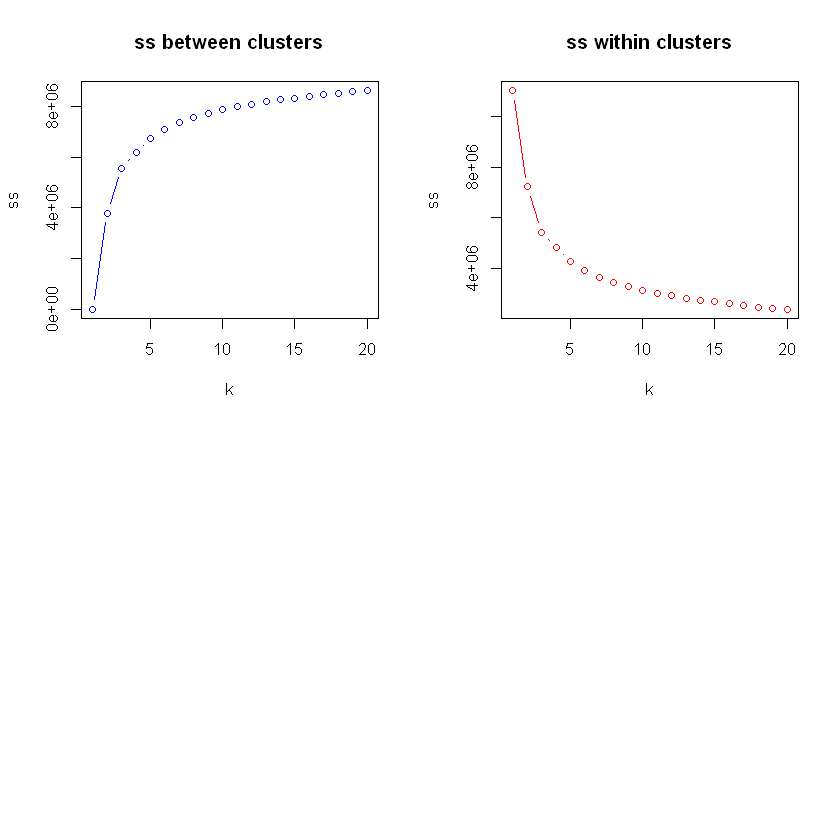

In [10]:
set.seed(2)
km.15 <- selectBestkMeans(data = df.log[-naind, ], K = 20, itermax = 20, n.inits = 10)

[1]   9544 125076   8899  10413   6620  10634   4698   4141  13687   3570
[11]   6098   7086   4062   7493

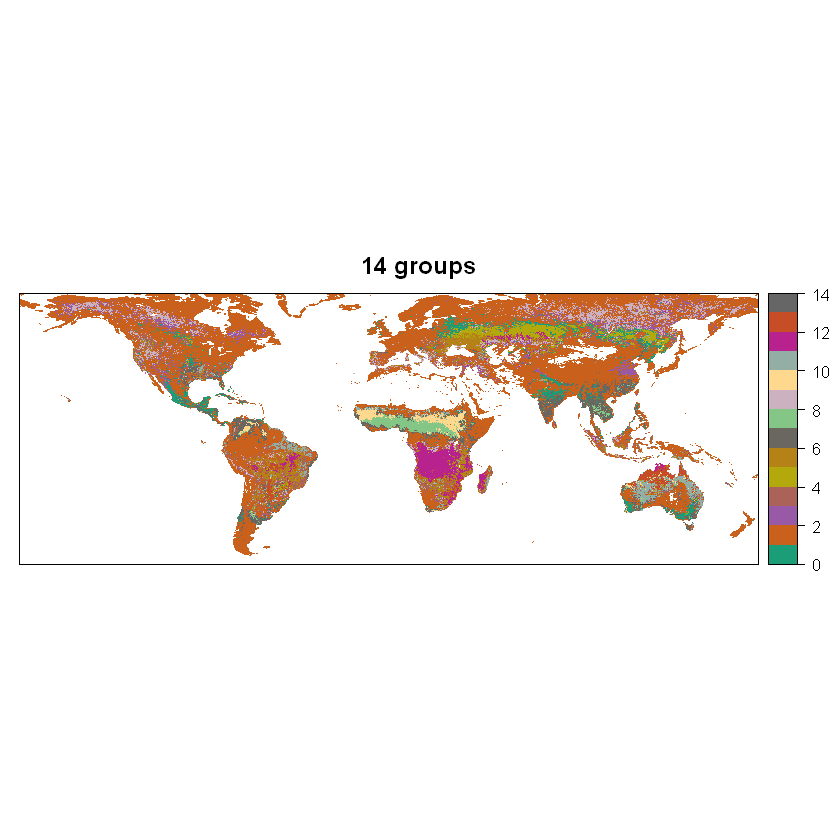

In [12]:
km.15[[14]]$size
km.df.14 <- plotClust.kmeans(df.log, coords, km.15[[14]], col.regions = group.colors(14),
                      at = seq(0, 14, 1), ylim = c(-60, 72), main = "14 groups")

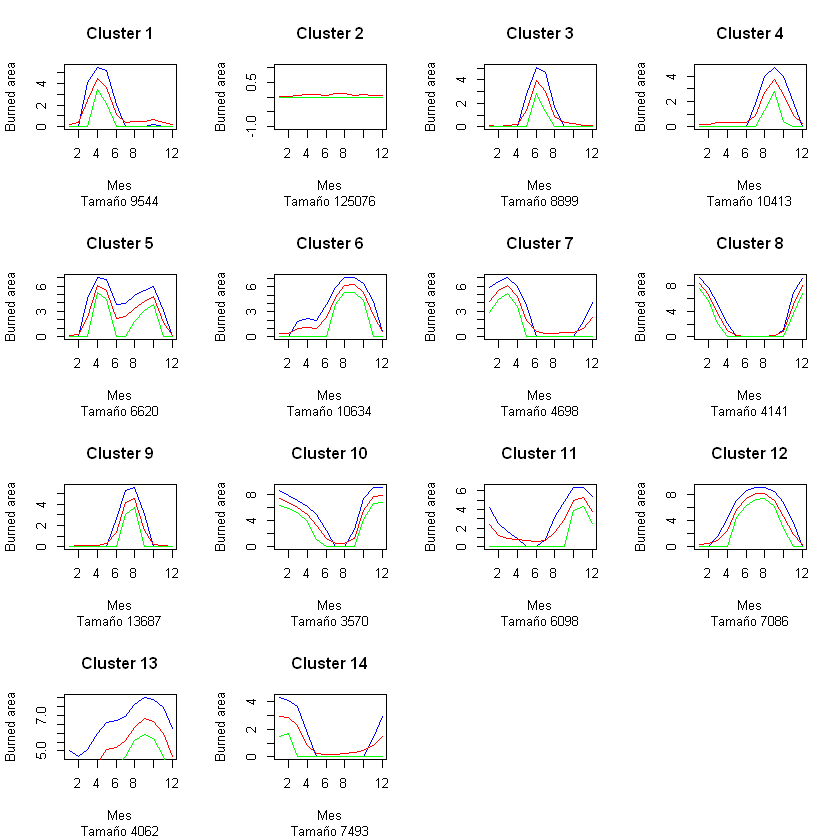

In [14]:
# Representación de los centroides de cada cluster junto con los cuantiles 25 y 75 del cluster para k = 14
k = 14
par(mfrow = c(4, 4))
d = c()

for (i in 1:k){
    centroide = colMeans(df.log[-naind, ][which(km.15[[14]]$cluster == i),])
    d[i] = sum((df.log[-naind, ][which(km.15[[14]]$cluster == i),] - centroide)^2) / km.15[[14]]$size[i]
    
    per.25 = c()
    per.75 = c()
    for (j in 1:12){
        per.25[j] = quantile(df.log[-naind, ][which(km.15[[14]]$cluster == i),j], prob=0.25)
        per.75[j] = quantile(df.log[-naind, ][which(km.15[[14]]$cluster == i),j], prob=0.75)
    }
    plot(per.75, col = 'blue', type = 'l', xlab = "Mes", ylab = "Burned area",
        main = paste('Cluster', toString(i)), sub = paste('Tamaño', toString(km.15[[14]]$size[i])))
    lines(1:12, centroide, col = "red")
    lines(1:12, per.25, col = "green")
}

# Gaussian Mixtures

Búsqueda del número óptimo de clusters con el método de gaussian mixtures usando el BIC. Se han realizado varios intentos

In [59]:
f = Mclust(df.log[-naind, ], G=1:60)

In [60]:
# numero de clusters entre 1 y 60 (prueba 1)
f$BIC

Bayesian Information Criterion (BIC): 
         EII       VII       EEI       VEI       EVI       VVI      EEE
1  -11343019 -11343019 -11279817 -11279817 -11279817 -11279817 -8929740
2  -10426931        NA -10381121        NA        NA        NA -8788438
3   -9759642        NA  -9627236        NA        NA        NA -8698877
4   -9532411        NA  -9421026        NA        NA        NA -8522917
5   -9291085        NA  -9216390        NA        NA        NA -8473137
6   -9291371        NA  -9216548        NA        NA        NA -8372536
7   -9120408        NA  -9037302        NA        NA        NA -8354340
8   -9014019        NA  -8906273        NA        NA        NA -8284852
9   -8961366        NA  -8739887        NA        NA        NA -8190170
10  -8805107        NA  -8690363        NA        NA        NA -8171334
11  -8684818        NA  -8574737        NA        NA        NA -8148925
12  -8631009        NA  -8532325        NA        NA        NA -8051253
13  -8543863        NA  -

In [58]:
# numero de clusters entre 1 y 60 (prueba 2)
f$BIC

Bayesian Information Criterion (BIC): 
         EII       VII       EEI       VEI       EVI       VVI      EEE
1  -11343019 -11343019 -11279817 -11279817 -11279817 -11279817 -8929740
2  -10426933        NA -10381122        NA        NA        NA -8788409
3   -9759627        NA  -9627207        NA        NA        NA -8629351
4   -9532384        NA  -9421120        NA        NA        NA -8521356
5   -9291155        NA  -9216409        NA        NA        NA -8383164
6   -9120280        NA  -9037085        NA        NA        NA -8330648
7   -9120427        NA  -8906110        NA        NA        NA -8316665
8   -9014010        NA  -8870544        NA        NA        NA -8243365
9   -8863141        NA  -8739862        NA        NA        NA -8120724
10  -8805001        NA  -8690394        NA        NA        NA -8044647
11  -8684810        NA  -8574745        NA        NA        NA -8020552
12  -8599511        NA  -8512451        NA        NA        NA -7985216
13  -8543717        NA  -

In [56]:
# numero de clusters entre 1 y 60 (prueba 3)
f$BIC

Bayesian Information Criterion (BIC): 
         EII       VII       EEI       VEI       EVI       VVI      EEE
1  -11343019 -11343019 -11279817 -11279817 -11279817 -11279817 -8929740
2  -10426936        NA -10381123        NA        NA        NA -8788380
3   -9759626        NA  -9627203        NA        NA        NA -8698678
4   -9548458        NA  -9420799        NA        NA        NA -8463404
5   -9291171        NA  -9216342        NA        NA        NA -8372371
6   -9120289        NA  -9060722        NA        NA        NA -8372517
7   -9120444        NA  -9075515        NA        NA        NA -8211209
8   -8977005        NA  -8905784        NA        NA        NA -8107538
9   -8926935        NA  -8739885        NA        NA        NA -8130663
10  -8784113        NA  -8626554        NA        NA        NA -8073977
11  -8684931        NA  -8619270        NA        NA        NA -8028117
12  -8631278        NA  -8516732        NA        NA        NA -7967309
13  -8543879        NA  -

In [53]:
# numero de clusters entre 1 y 40
f$BIC

Bayesian Information Criterion (BIC): 
         EII       VII       EEI       VEI       EVI       VVI      EEE
1  -11343019 -11343019 -11279817 -11279817 -11279817 -11279817 -8929740
2  -10426930        NA -10381121        NA        NA        NA -8788415
3   -9759642        NA  -9627219        NA        NA        NA -8698902
4   -9532370        NA  -9421036        NA        NA        NA -8530362
5   -9532436        NA  -9421127        NA        NA        NA -8479239
6   -9291379        NA  -9216503        NA        NA        NA -8216353
7   -9120429        NA  -9075473        NA        NA        NA -8281206
8   -9014111        NA  -9022446        NA        NA        NA -8354154
9   -8961370        NA  -8854340        NA        NA        NA -8081726
10  -8805070        NA  -8626518        NA        NA        NA -8018912
11  -8684740        NA  -8574901        NA        NA        NA -8019031
12  -8631250        NA  -8516743        NA        NA        NA -7920961
13  -8516120        NA  -

In [18]:
mclustModelNames('EEV')

$model
[1] "EEV"

$type
[1] "ellipsoidal, equal volume and shape"

In [14]:
# numero de clusters entre 1 y 20
f$BIC

Bayesian Information Criterion (BIC): 
         EII       VII       EEI       VEI       EVI       VVI      EEE
1  -11343019 -11343019 -11279817 -11279817 -11279817 -11279817 -8929740
2  -10426931        NA -10381120        NA        NA        NA -8788367
3   -9759642        NA  -9627181        NA        NA        NA -8629349
4   -9548464        NA  -9415566        NA        NA        NA -8629512
5   -9291155        NA  -9216410        NA        NA        NA -8455343
6   -9120274        NA  -9060748        NA        NA        NA -8333738
7   -8976874        NA  -8905545        NA        NA        NA -8320971
8   -8926638        NA  -8853895        NA        NA        NA -8241474
9   -8961378        NA  -8854146        NA        NA        NA -8190353
10  -8849145        NA  -8690365        NA        NA        NA -8163189
11  -8630978        NA  -8690529        NA        NA        NA -8094831
12  -8631752        NA  -8574913        NA        NA        NA -8007021
13  -8563257        NA  -

Atendiendo a los resultados obtenidos, parece que el método siempre pide más clusters, aunque llega un momento que ya no converge. Además, en todos los casos el modelo que mejor funciona es el 'EEV' (ellipsoidal, equal volume and shape).

Visto que el resultado del clustering obtenido varía a cada intento, creamos una función para agilizar el proceso de realizar varios intentos del método de agrupamiento.

In [17]:
#' @title Best GMM model selection
#' @description Retain the lowest BIC model after an arbitary number of GMM initializations
#' @param data Data frame
#' @param K number of groups
#' @param n.inits Number of initializations. Default to 10
#' @return A mclust-class model
#' @importFrom mclust Mclust

selectBestGMM <- function(data, K, n.inits = 3) {
    i <- 1
    gmm.list <- rep(list(bquote(), n.inits))
    while (i <= n.inits) {
        set.seed(i)
        gmm.list[[i]] <- Mclust(data, G = 1:K)  
        i <- i + 1
    } 
    bics <- numeric(length(gmm.list))
    for (i in 1:length(gmm.list)) {
        bics[i] <- gmm.list[[i]]$bic
    }
    ind = which.min(bics)
    gmm <- gmm.list[[ind]]
    message("Lowest BIC: ", round(min(bics), 2))
    message("Number of clusters:", gmm$G)
    return (list("gmm" = gmm.list, "ind" = ind))
}

Dos iteraciones con numero de clusters entre 1 y 30:

In [8]:
gmm30 <- selectBestGMM(data = df.log[-naind, ], K = 30, n.inits = 2)

Lowest BIC: -5385117.35
Number of clusters:29


In [10]:
for (i in 1:2){
    cat(gmm30$gmm[[i]]$G, gmm30$gmm[[i]]$bic,'\n')
}

29 -5385117 
30 -5322347 


Dos iteraciones con numero de clusters entre 1 y 40:

In [12]:
gmm40 <- selectBestGMM(data = df.log[-naind, ], K = 40, n.inits = 2)

Lowest BIC: -5151089.52
Number of clusters:39


In [13]:
for (i in 1:2){
    cat(gmm40$gmm[[i]]$G, gmm40$gmm[[i]]$bic,'\n')
}

36 -5131385 
39 -5151090 


Dos iteraciones con numero de clusters entre 1 y 15:

In [12]:
naind.2 <- which(is.na(df.log.med), arr.ind = TRUE)
gmm.med <- selectBestGMM(data = df.log.med[-naind.2, ], K = 15)

Lowest BIC: -124936.94
Number of clusters:14


In [13]:
for (i in 1:3){
    cat(gmm.med$gmm[[i]]$G, gmm.med$gmm[[i]]$bic,'\n')
}

14 -124936.9 
15 -124845 
15 -123621.7 


In [29]:
naind2 <- which(is.na(df.log.med), arr.ind = TRUE)
v <- numeric(nrow(df.log[ind.coords.med,]))
v[naind2] <- NA
length(v)
#naind2

[1] 7680

Otra prueba con número de clusters entre 6 y 20:

In [7]:
gmm.list.1 = list()
for (g in 6:20){
    set.seed(1)
    gmm.list.1[[g]] <- Mclust(df.log[-naind, ], G = c(g))
}

gmm.list.2 = list()
for (g in 6:20){
    set.seed(2)
    gmm.list.2[[g]] <- Mclust(df.log[-naind, ], G = c(g))
}



Representación de cómo evoluciona el bic según el número de clusters escogidos:

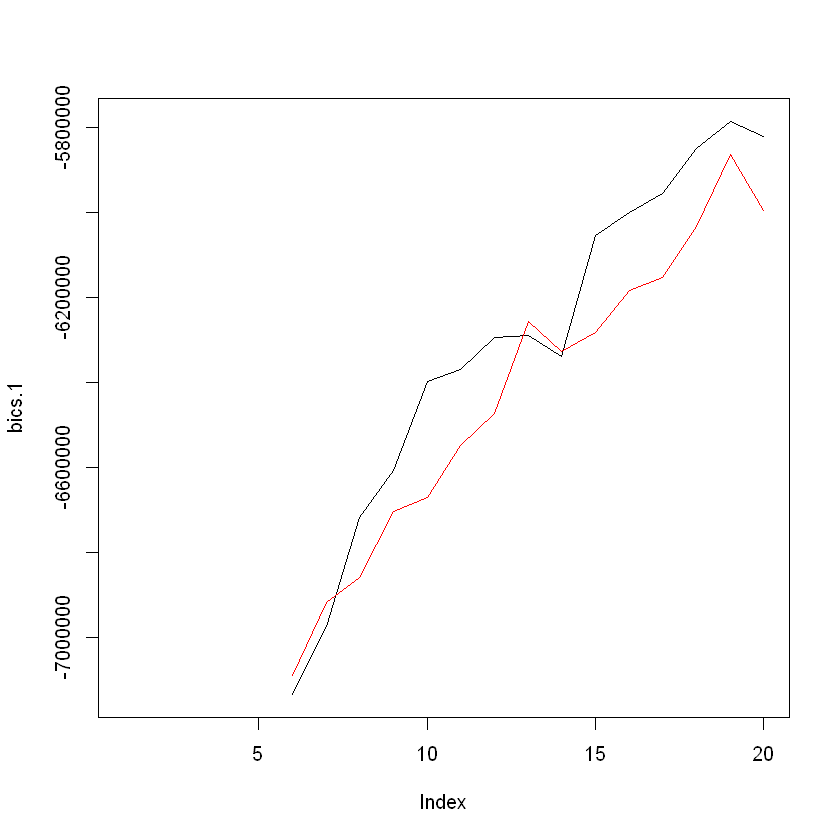

In [33]:
bics.1 = c()
bics.2 = c()
for (g in 6:20){
    bics.1[g] = gmm.list.1[[g]]$bic
    bics.2[g] = gmm.list.2[[g]]$bic
}
plot(bics.1, type = 'l')
lines(bics.2, col = 'red')

Representación de cómo evoluciona el tamaño del cluster más peuqueño según el número de clusters escogidos:

In [50]:
minsize.1 = matrix(NaN,15,20)
minsize.2 = matrix(NaN,15,20)
for (g in 6:20){
    
    for (i in 1:g){
        minsize.1[g-5,i]=sum(gmm.list.1[[g]]$classification == i)
        minsize.2[g-5,i]=sum(gmm.list.2[[g]]$classification == i)
    }
    
}

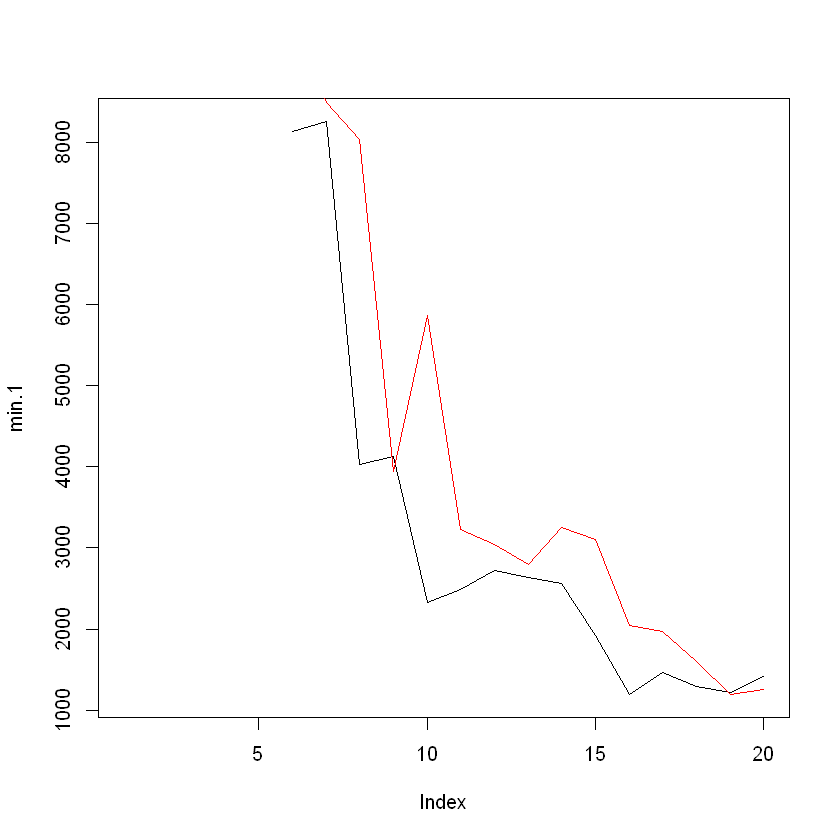

In [64]:
min.1=c()
min.2=c()
max.1=c()
max.2=c()

for (g in 6:20){
    min.1[g] = min(minsize.1[g-5,],na.rm=T)
    min.2[g] = min(minsize.2[g-5,],na.rm=T)
    max.1[g] = max(minsize.1[g-5,],na.rm=T)
    max.2[g] = max(minsize.2[g-5,],na.rm=T)
}

plot(min.1, type = 'l')
lines(min.2, col = 'red')

Con número de clusters entre 1 y 20, 8 iteraciones:

In [86]:
gmm.log.20 <- selectBestGMM(data = df.log[-naind, ], K = 20, n.inits = 8)

Lowest BIC: -5865759.91
Number of clusters:20


In [90]:
for (i in 1:8){
    cat(gmm.log.20$gmm[[i]]$bic, gmm.log.20$gmm[[i]]$G, '\n')
}

-5779737 19 
-5863303 19 
-5855966 20 
-5732639 20 
-5865760 20 
-5749742 20 
-5754219 19 
-5817363 20 


Para una de las iteraciones en las que obtuvimos 20 clusters, miramos el tamaño de los clusters:

In [95]:
for (i in 1:20){
    cat(i, sum(gmm.log.20$gmm[[n]]$classification == i),'\n')
}

1 12315 
2 13676 
3 2734 
4 7879 
5 6743 
6 2660 
7 1703 
8 2868 
9 5930 
10 3825 
11 5001 
12 6796 
13 2858 
14 121494 
15 3191 
16 1724 
17 2692 
18 8656 
19 2633 
20 6643 


Con número de clusters entre 1 y 15, 8 iteraciones:

In [65]:
gmm.log <- selectBestGMM(data = df.log[-naind, ], K = 15, n.inits = 8)

Lowest BIC: -6272834.92
Number of clusters:14


In [67]:
for (i in 1:8){
    cat(gmm.log$gmm[[i]]$bic, gmm.log$gmm[[i]]$G, '\n')
}

-6272835 14 
-6032340 15 
-6137040 14 
-6066640 15 
-6134992 15 
-6115995 15 
-6240031 15 
-6051990 15 


In [ ]:
#' @title Clusters' spatial location plot 
#' @description Plots the clusters' spatial location in a map
#' @param df Data frame containing the burned area data
#' @param coords Data frame containing the spatial coordinates
#' @param clus A mclust-class model
#' @return Data of the plot

plotClust.gmm <- function(df, coords, clus, ...) {
    arg.list <- list(...)
    v <- numeric(nrow(df))
    v[naind] <- NA
    v[-naind] <- clus$classification
    df1 <- cbind.data.frame(coords, v)
    coordinates(df1) <- c(1,2)
    gridded(df1) <- TRUE
    arg.list[["obj"]] <- df1
    arg.list[["zcol"]] <- 1
    do.call("spplot", arg.list) %>% print()
    return(df1@data)
}

# Para los colores
require(RColorBrewer)
#display.brewer.all()
group.colors <- colorRampPalette(c(brewer.pal(13, "Dark2"), brewer.pal(13, "Accent")))

In [1]:
Representación espacial de los clusters para el mejor modelo obtenido en el clustering precedente.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected symbol
1: Representación espacial
                   ^


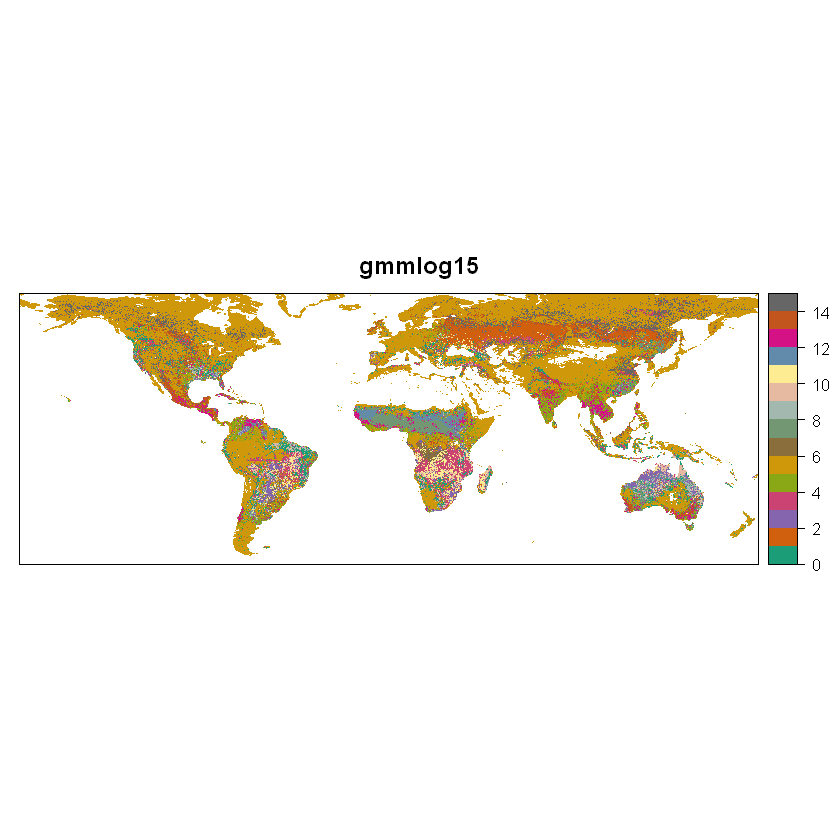

In [9]:
gmm.log <- plotClust.gmm(df.log, coords, gmm.log$gmm[[7]], col.regions = group.colors(15),
                      at = seq(0, 15, 1), ylim = c(-60, 72), main = "gmmlog15")

Volví a lanzar el análisis anterior otra vez:

In [11]:
for (i in 1:8){
    cat(gmm.log$gmm[[i]]$bic, gmm.log$gmm[[i]]$G, '\n')
}

-6096057 15 
-6166015 15 
-6166331 13 
-6117464 15 
-6115048 15 
-6170079 14 
-6118326 15 
-5924451 15 


Representación espacial de los clusters para la iteración en las que salieron 14 clusters:

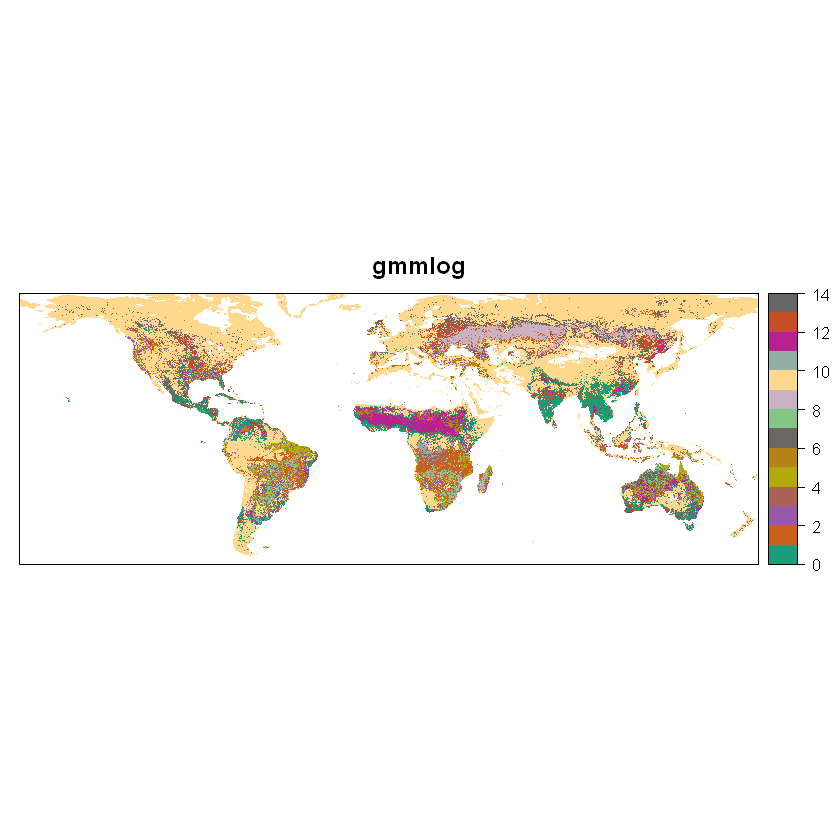

In [13]:
gmm.log <- plotClust.gmm(df.log, coords, gmm.log$gmm[[6]], col.regions = group.colors(14),
                      at = seq(0, 14, 1), ylim = c(-60, 72), main = "gmmlog")

Ahora sin usar los datos logarítmicos:

In [7]:
gmm.15 <- selectBestGMM(data = df[-naind, ], K = 15, n.inits = 7)

Lowest BIC: -34033618.96
Number of clusters:6


In [9]:
for (i in 1:7){
    cat(gmm.15$gmm[[i]]$bic, gmm.15$gmm[[i]]$G, '\n')
}

-34033619 6 
-33830043 15 
-33903525 14 
-33864688 15 
-33839192 15 
-33795941 15 
-33821612 15 


Representación espacial de los clusters para la iteración en las que salieron 14 clusters, claramente es peor que al usar los datos logarítmicos:

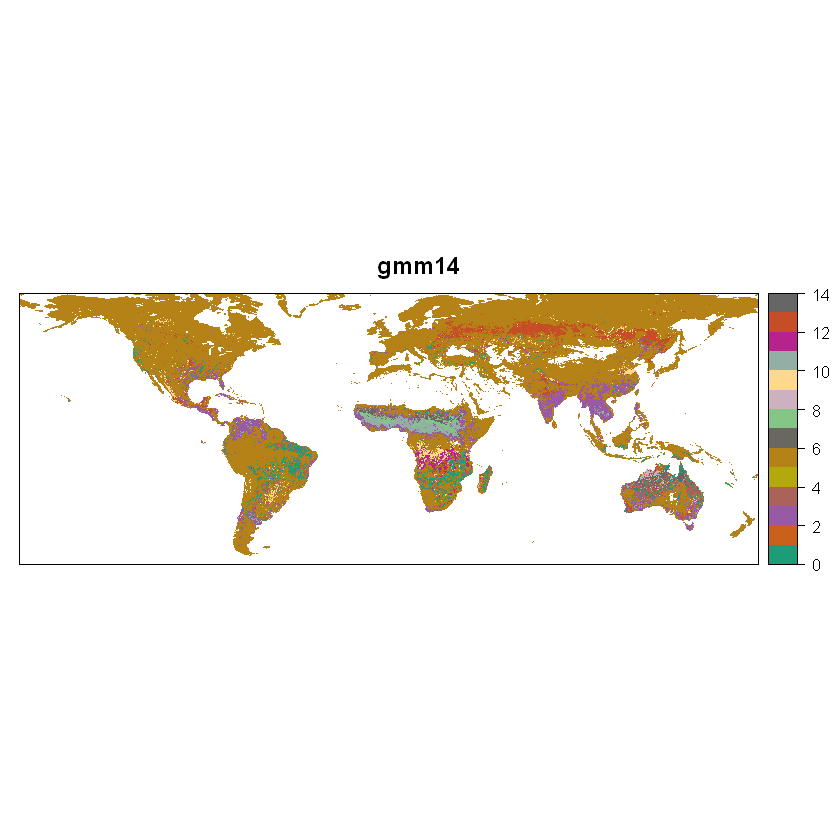

In [16]:
gmm.df.15 <- plotClust.gmm(df, coords, gmm.15$gmm[[n]], col.regions = group.colors(14),
                      at = seq(0, 14, 1), ylim = c(-60, 72), main = "gmm14")

# Análisis de la zona mediterránea

Particularizamos el clustering para una zona más concreta:

In [10]:
# coordenadas mediterraneas: 
lon <- c(-10, 20)
lat <- c(35, 46)

In [35]:
ind.coords.med = which(coords$x < 30 & coords$x > -10 & coords$y > 35 & coords$y < 47)
df.log.med = df.log[ind.coords.med,]
df.med = df[ind.coords.med,]

In [36]:
# Localizamos los NAs
naind.med <- which(is.na(df.log.med), arr.ind = TRUE)
length(naind.med)

[1] 76176

Uso los datos logarítmicos:

In [38]:
gmmMed <- selectBestGMM(data = df.log.med[-naind.med, ], K = 15, n.inits = 10)

Lowest BIC: NA
Number of clusters:4


In [39]:
for (i in 1:10){
    cat(gmmMed$gmm[[i]]$G, gmmMed$gmm[[i]]$bic,'\n')
}

6 NA 
4 -111436.3 
4 -103338.8 
7 -99752.25 
4 NA 
6 NA 
5 -109816.5 
6 NA 
5 -108452.4 
4 -110978.8 


Representación espacial para 7 clusters:

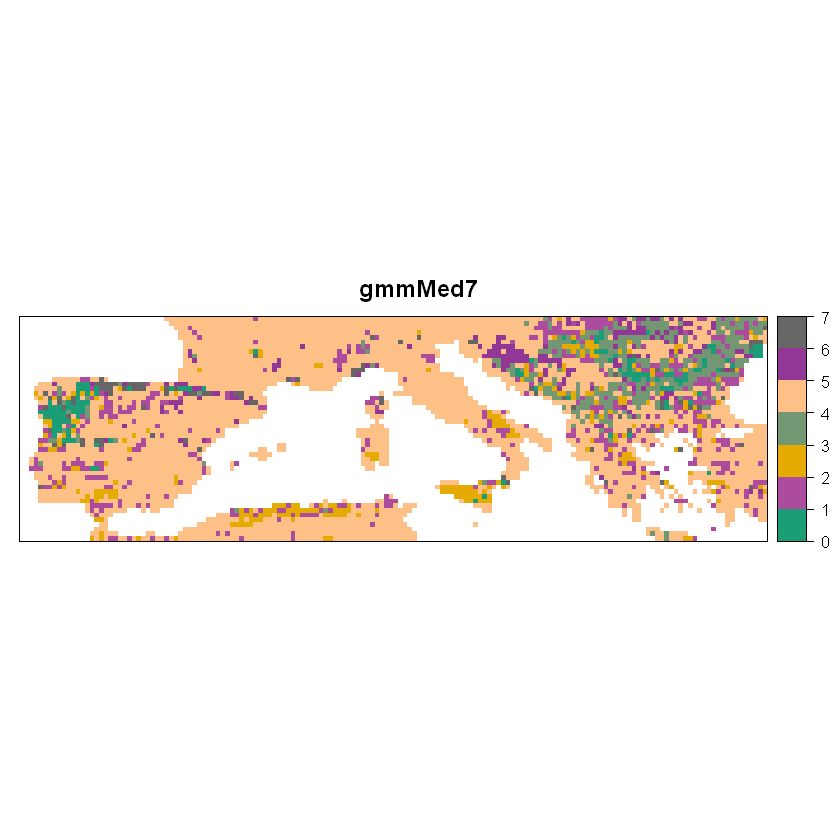

In [42]:
arg.list <- list(col.regions = group.colors(7),
                      at = seq(0, 7, 1), main = "gmmMed7")
v <- numeric(nrow(df.med))
v[naind.med] <- NA
v[-naind.med] <- gmmMed$gmm[[4]]$classification
df1 <- cbind.data.frame(coords[ind.coords.med,], v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
do.call("spplot", arg.list) %>% print()

Representación espacial para 5 clusters:

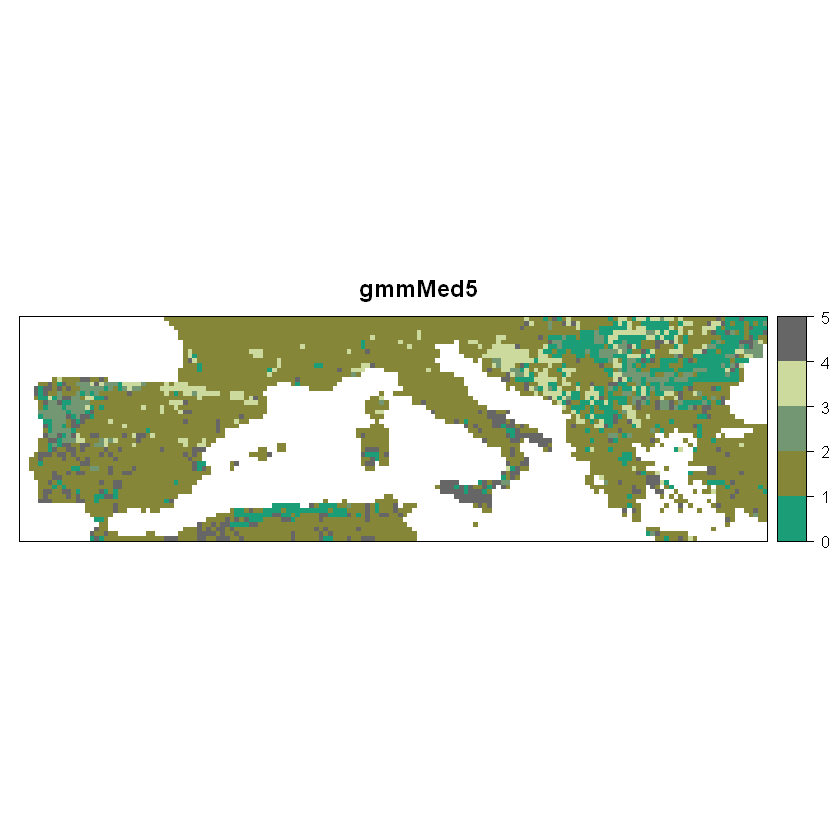

In [43]:
arg.list <- list(col.regions = group.colors(5),
                      at = seq(0, 5, 1), main = "gmmMed5")
v <- numeric(nrow(df.med))
v[naind.med] <- NA
v[-naind.med] <- gmmMed$gmm[[7]]$classification
df1 <- cbind.data.frame(coords[ind.coords.med,], v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
do.call("spplot", arg.list) %>% print()